In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

## Data Preprocessing

In [2]:
#Read file exported from EDA notebook
df = pd.read_csv("EDA_Dataset.csv", encoding = 'ISO-8859-1', parse_dates=[0], dayfirst=True)

In [3]:
#Read file exported from EDA notebook
dfcheck = pd.read_csv("CustomerTestCellDefinition.csv", encoding = 'ISO-8859-1', parse_dates=[0], dayfirst=True)

In [4]:
dfcheck.head()

,Location ID,Customer Type,Test Cell ID,Sub Group,Extended Sub Group,In/Out Region,Data Valid Start Date,Data Valid End Date
0,100001,SME,1b,12,NaN,0,01/09/2011,30/08/2012
1,100002,SME,1b,3,NaN,0,01/09/2011,30/08/2012
2,100003,SME,1b,28,NaN,0,01/05/2012,30/08/2012
3,100004,SME,1b,15,NaN,0,01/09/2011,19/07/2012
4,100005,SME,1b,3,NaN,0,01/09/2011,30/08/2012


In [5]:
#Find locations that did not participate in full trial and assign to new dataframe
count = dfcheck[(dfcheck['Data Valid Start Date'] != '01/09/2011') | (dfcheck['Data Valid End Date'] != '30/08/2012')].count()
dfcheck = dfcheck[(dfcheck['Data Valid Start Date'] != '01/09/2011') | (dfcheck['Data Valid End Date'] != '30/08/2012')]
count

Location ID              273
Customer Type            273
Test Cell ID             273
Sub Group                273
Extended Sub Group         0
In/Out Region            273
Data Valid Start Date    273
Data Valid End Date      273
dtype: int64

In [6]:
#Create column to assign invalid to these locations
dfcheck['Invalid'] = 'Invalid'

In [7]:
dfcheck.head()

,Location ID,Customer Type,Test Cell ID,Sub Group,Extended Sub Group,In/Out Region,Data Valid Start Date,Data Valid End Date,Invalid
2,100003,SME,1b,28,NaN,0,01/05/2012,30/08/2012,Invalid
3,100004,SME,1b,15,NaN,0,01/09/2011,19/07/2012,Invalid
10,100011,SME,1b,6,NaN,0,01/05/2012,30/08/2012,Invalid
15,100016,SME,1b,8,NaN,0,01/09/2011,03/07/2012,Invalid
19,100020,SME,1b,24,NaN,0,01/05/2012,30/08/2012,Invalid


In [8]:
#Select only Location and Invalid columns and assign to dataframe
dfcheck = dfcheck.loc[:, ['Location ID','Invalid']] 

In [9]:
dfcheck.head()

,Location ID,Invalid
2,100003,Invalid
3,100004,Invalid
10,100011,Invalid
15,100016,Invalid
19,100020,Invalid


In [10]:
#Convert to datetime
df['Date and Time of capture'] = pd.to_datetime(df['Date and Time of capture'], format='%Y/%m/%d %H:%M:%S')

In [11]:
#Find last date on EDA dataframe 
df['Date and Time of capture'].max()

Timestamp('2012-08-30 23:30:00')

In [12]:
#Count number of unique Locations
df['Location ID'].nunique()

1783

In [13]:
#Find maximum number of readings a location can have
df.groupby(by='Location ID')['Date and Time of capture'].count().max()

17520

In [14]:
#Create series with count values
df1 = df.groupby(by='Location ID')['Date and Time of capture'].count()

In [15]:
#Count of incomplete locations
df1.loc[df.groupby(by='Location ID')['Date and Time of capture'].count() < 17520 ].count()

873

In [16]:
#Display series
df1

Location ID
100001    17517
100002     7265
100003     5856
100004    15481
100005    17517
          ...  
101783    17520
101784     5856
101785     9430
101786    17510
101787    17520
Name: Date and Time of capture, Length: 1783, dtype: int64

In [17]:
#Shape of series
df1.shape

(1783,)

In [18]:
#Convert series to dataframe
df1.to_frame()

,Date and Time of capture
Location ID,
100001,17517
100002,7265
100003,5856
100004,15481
100005,17517
...,...
101783,17520
101784,5856
101785,9430


In [19]:
#Merge count dataframe with EDA dataframe on Location ID
df2 = (pd.merge(df, df1, on='Location ID'))

In [20]:
#Convert Location ID to integer
dfcheck["Location ID"] = dfcheck["Location ID"].astype(int)

In [21]:
#Merge invalid dataframe with df2 on Location ID
df2 = (pd.merge(df2, dfcheck, on='Location ID', how='left'))

In [22]:
df2.head()

,Unnamed: 0,Location ID,Measurement Description,Parameter Type and Units,Date and Time of capture_x,Parameter,Date,Month,Year,Quarter,DayOfWeek,Hour,Season,Date and Time of capture_y,Invalid
0,0,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,0.893,2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,17520,NaN
1,1,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,0.824,2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,17520,NaN
2,2,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,0.795,2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,17520,NaN
3,3,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,0.847,2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,17520,NaN
4,4,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,0.730,2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,17520,NaN


In [23]:
#Assign all invalid records to check dataframe
dfcheck = df2.loc[(df2['Invalid'] == 'Invalid')]

In [24]:
#Ensure count is consistent with previous count
dfcheck['Location ID'].nunique()

273

In [25]:
df2.loc[(df2['Invalid'] == 'Invalid')]

,Unnamed: 0,Location ID,Measurement Description,Parameter Type and Units,Date and Time of capture_x,Parameter,Date,Month,Year,Quarter,DayOfWeek,Hour,Season,Date and Time of capture_y,Invalid
105116,288,101155,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,0.112,2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,14945,Invalid
105117,289,101155,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,0.116,2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,14945,Invalid
105118,290,101155,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,0.115,2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,14945,Invalid
105119,291,101155,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,0.666,2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,14945,Invalid
105120,292,101155,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,1.111,2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,14945,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26655801,13864326,100144,Electricity supply meter,Consumption in period [kWh],2012-08-30 21:30:00,0.001,2012-08-30 21:30:00,8,2012,3,Thursday,21:30:00,Summer,585,Invalid
26655802,13864327,100144,Electricity supply meter,Consumption in period [kWh],2012-08-30 22:00:00,0.001,2012-08-30 22:00:00,8,2012,3,Thursday,22:00:00,Summer,585,Invalid
26655803,13864328,100144,Electricity supply meter,Consumption in period [kWh],2012-08-30 22:30:00,0.001,2012-08-30 22:30:00,8,2012,3,Thursday,22:30:00,Summer,585,Invalid
26655804,13864329,100144,Electricity supply meter,Consumption in period [kWh],2012-08-30 23:00:00,0.002,2012-08-30 23:00:00,8,2012,3,Thursday,23:00:00,Summer,585,Invalid


In [26]:
#Drop invalid records from dataframe
df2 = df2.drop(df2[df2['Invalid'] == 'Invalid'].index)

In [27]:
df2.head()

,Unnamed: 0,Location ID,Measurement Description,Parameter Type and Units,Date and Time of capture_x,Parameter,Date,Month,Year,Quarter,DayOfWeek,Hour,Season,Date and Time of capture_y,Invalid
0,0,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,0.893,2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,17520,NaN
1,1,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,0.824,2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,17520,NaN
2,2,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,0.795,2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,17520,NaN
3,3,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,0.847,2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,17520,NaN
4,4,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,0.730,2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,17520,NaN


In [28]:
#Rename Column
df2 = df2.rename(columns={"Date and Time of capture_y": "Records"})

In [29]:
#Rename Column
df2 = df2.rename(columns={"Date and Time of capture_x": "Date and Time of capture"})

In [30]:
#Drop Invalid column
df2 = df2.drop(['Invalid'], axis=1)

In [31]:
#Verify how many incomplete records still exist in dataframe
dftest = df2.loc[df2["Records"] < 17520]

In [32]:
#Count of invalid records
dftest["Location ID"].nunique()

600

In [33]:
#Assign only locations with complete records to new dataframe
df3 = df2.loc[df2["Records"] == 17520]

In [34]:
df3.head()

,Unnamed: 0,Location ID,Measurement Description,Parameter Type and Units,Date and Time of capture,Parameter,Date,Month,Year,Quarter,DayOfWeek,Hour,Season,Records
0,0,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,0.893,2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,17520
1,1,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,0.824,2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,17520
2,2,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,0.795,2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,17520
3,3,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,0.847,2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,17520
4,4,100600,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,0.730,2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,17520


In [35]:
#Find number of unique locations in dataframe
df3["Location ID"].nunique()

910

In [36]:
#Drop column
df3 = df3.drop(['Unnamed: 0'], axis=1)

In [37]:
#Sum values for each location for each datetime
df4 = df3.pivot_table(values='Parameter', index = 'Date and Time of capture', aggfunc= 'sum')

In [38]:
df4.head()

,Parameter
Date and Time of capture,
2011-09-01 00:00:00,707.889
2011-09-01 00:30:00,705.840
2011-09-01 01:00:00,724.357
2011-09-01 01:30:00,713.332
2011-09-01 02:00:00,706.644


In [39]:
#Rename column to identify column with parameter sum
df4 = df4.rename(columns={"Parameter": "Total Parameter"})

In [40]:
#Merge both dataframe on Date and Time of capture
df5 = (pd.merge(df3, df4, on='Date and Time of capture'))

## Secondary EDA

Text(0.5, 1.0, 'Consumption by Location ID')

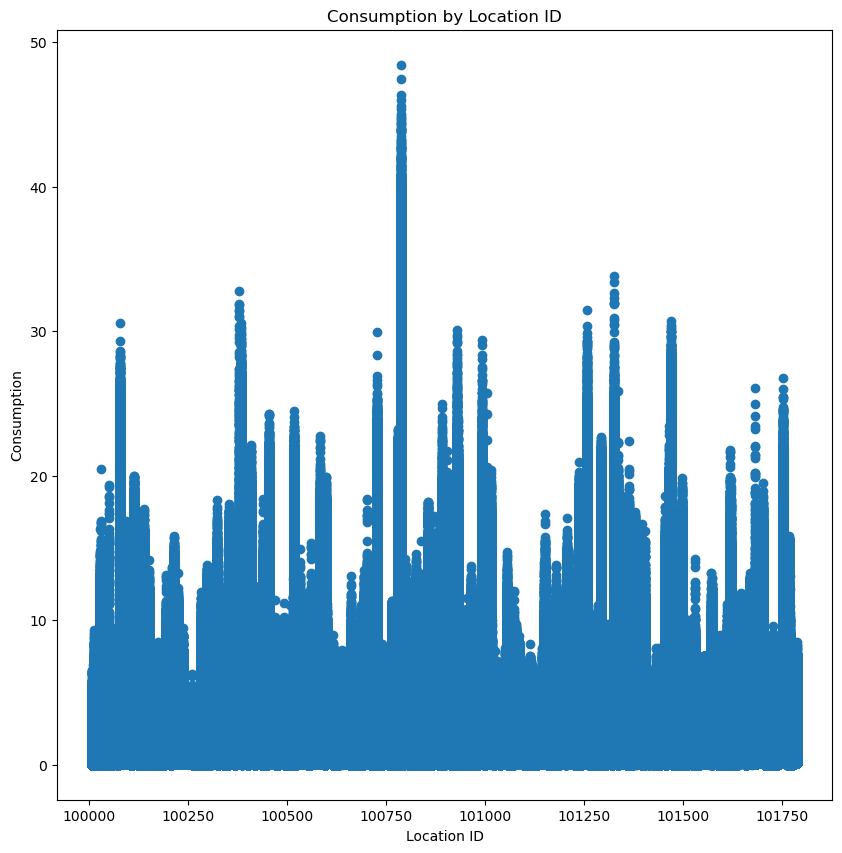

In [41]:
#Distribution of Load by Location ID
plt.figure(figsize=(10,10))
plt.scatter(x=df5['Location ID'], y=df5['Parameter'])
plt.xlabel('Location ID')
plt.ylabel('Consumption')
plt.title('Consumption by Location ID')

## Further Data Preparation for Plots

In [42]:
#Drop column
df5 = df5.drop(['Location ID'], axis=1)

In [43]:
#Drop column
df5 = df5.drop(['Parameter'], axis=1)

In [44]:
#Check existing variables and their type
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15943200 entries, 0 to 15943199
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Measurement Description   object        
 1   Parameter Type and Units  object        
 2   Date and Time of capture  datetime64[ns]
 3   Date                      object        
 4   Month                     int64         
 5   Year                      int64         
 6   Quarter                   int64         
 7   DayOfWeek                 object        
 8   Hour                      object        
 9   Season                    object        
 10  Records                   int64         
 11  Total Parameter           float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.5+ GB


In [45]:
#Drop duplicates
df5 = df5.drop_duplicates()

In [46]:
#Reset index
df5 = df5.reset_index()

In [47]:
#Convert Date and Time of capture to datetime
df5['Date and Time of capture'] = pd.to_datetime(df5['Date and Time of capture'], format='%d/%m/%Y %H:%M:%S')

In [48]:
#Find start date of dataframe
df['Date and Time of capture'].min()

Timestamp('2011-09-01 00:00:00')

In [49]:
#Drop date to convert Date into datetime
df5 = df5.drop(['Date'], axis=1)

In [50]:
#Create Date column with type datetime
df5['Date'] = pd.to_datetime(df5["Date and Time of capture"], format='%d/%m/%Y').dt.date

In [51]:
#Verify if minimum Date aligns with minimum Date and Time of capture
df['Date'].min()

'2011-09-01 00:00:00'

In [52]:
df5

,index,Measurement Description,Parameter Type and Units,Date and Time of capture,Month,Year,Quarter,DayOfWeek,Hour,Season,Records,Total Parameter,Date
0,0,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,17520,809.373,2012-03-01
1,910,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,17520,793.537,2012-03-01
2,1820,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,17520,884.144,2012-03-01
3,2730,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,17520,857.668,2012-03-01
4,3640,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,17520,839.702,2012-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,15938650,Electricity supply meter,Consumption in period [kWh],2012-02-29 21:30:00,2,2012,1,Wednesday,21:30:00,Winter,17520,1102.942,2012-02-29
17516,15939560,Electricity supply meter,Consumption in period [kWh],2012-02-29 22:00:00,2,2012,1,Wednesday,22:00:00,Winter,17520,1022.449,2012-02-29
17517,15940470,Electricity supply meter,Consumption in period [kWh],2012-02-29 22:30:00,2,2012,1,Wednesday,22:30:00,Winter,17520,942.478,2012-02-29
17518,15941380,Electricity supply meter,Consumption in period [kWh],2012-02-29 23:00:00,2,2012,1,Wednesday,23:00:00,Winter,17520,914.322,2012-02-29


Text(0.5, 1.0, 'Consumption by Day')

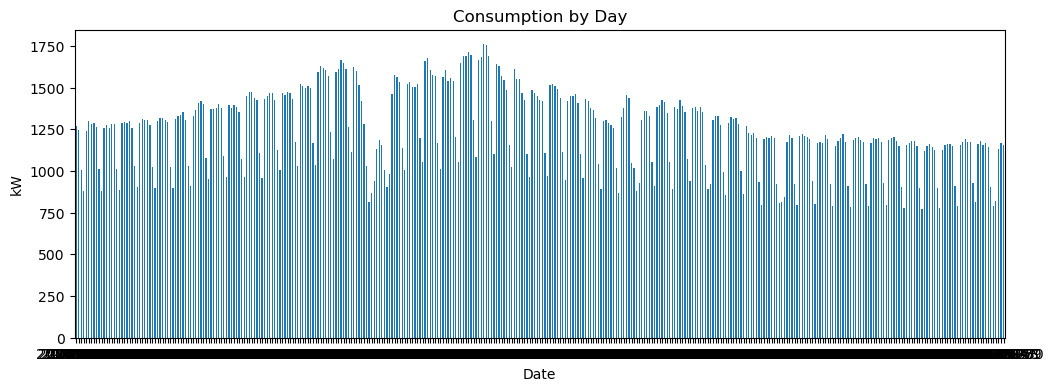

In [53]:
#Distribution of total load by day 
fig, axs = plt.subplots(figsize=(12, 4))
df5.groupby(df5["Date"])["Total Parameter"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Date");
plt.ylabel("kW");
plt.title('Consumption by Day')

Text(0.5, 1.0, 'Consumption by Day')

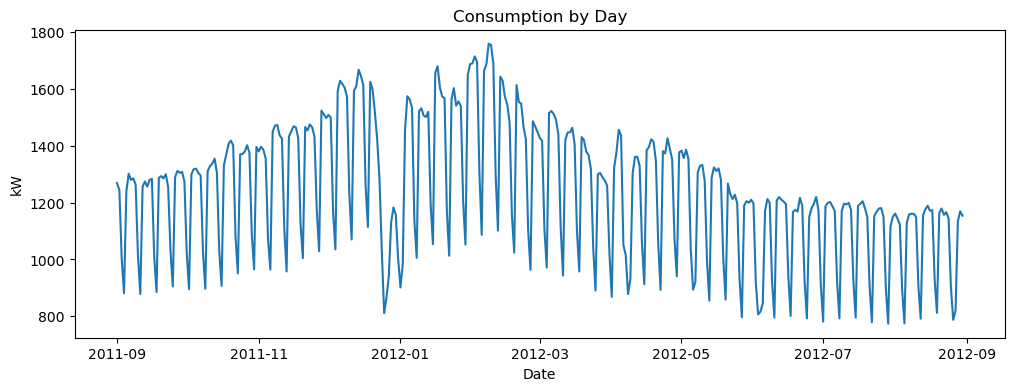

In [54]:
#Distribution of total load by day plot 2
fig, axs = plt.subplots(figsize=(12, 4))
df5.groupby(df5["Date"])["Total Parameter"].mean().plot(
    kind='line', rot=0, ax=axs
)
plt.xlabel("Date");
plt.ylabel("kW");
plt.title('Consumption by Day')

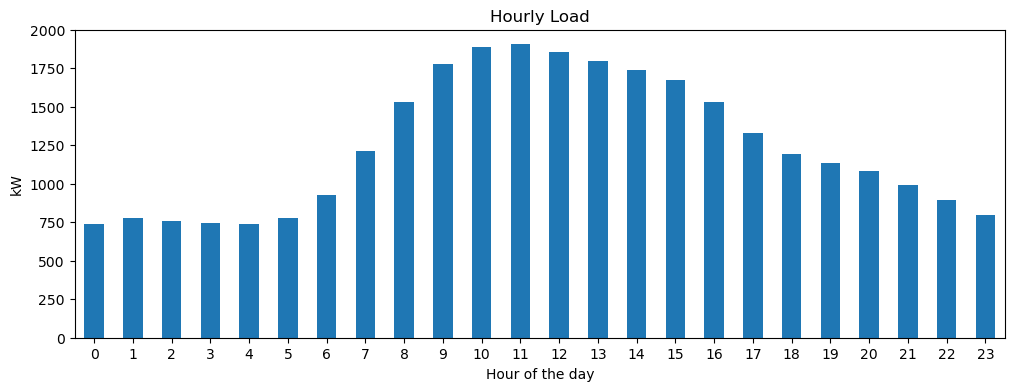

In [55]:
#Distribution of total load by hour  
fig, axs = plt.subplots(figsize=(12, 4))
df5.groupby(df5["Date and Time of capture"].dt.hour)["Total Parameter"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day");
plt.ylabel("kW");
plt.title('Hourly Load');

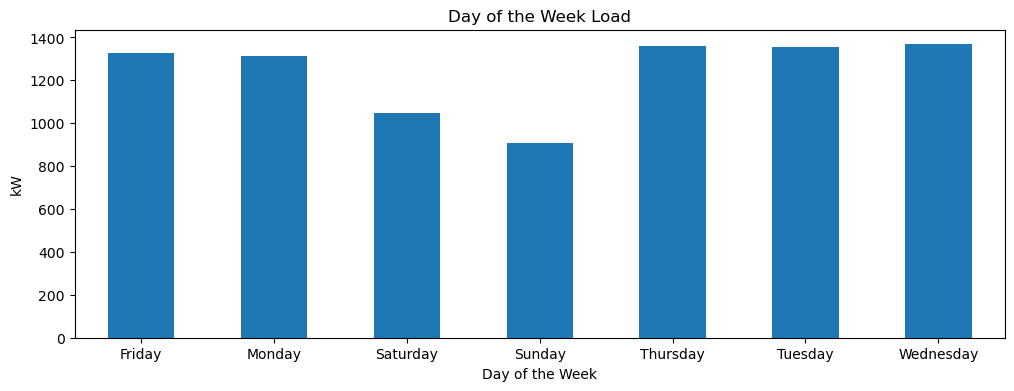

In [56]:
#Distribution of total load by day of the week
fig, axs = plt.subplots(figsize=(12, 4))
df5.groupby(df5["DayOfWeek"])["Total Parameter"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Day of the Week");
plt.ylabel("kW");
plt.title('Day of the Week Load');

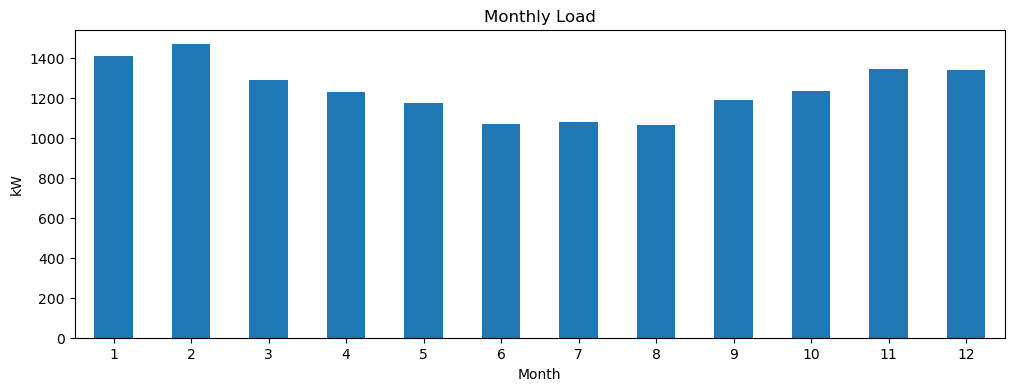

In [57]:
#Distribution of total load by month
fig, axs = plt.subplots(figsize=(12, 4))
df5.groupby(df5["Date and Time of capture"].dt.month)["Total Parameter"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Month");
plt.ylabel("kW");
plt.title('Monthly Load');

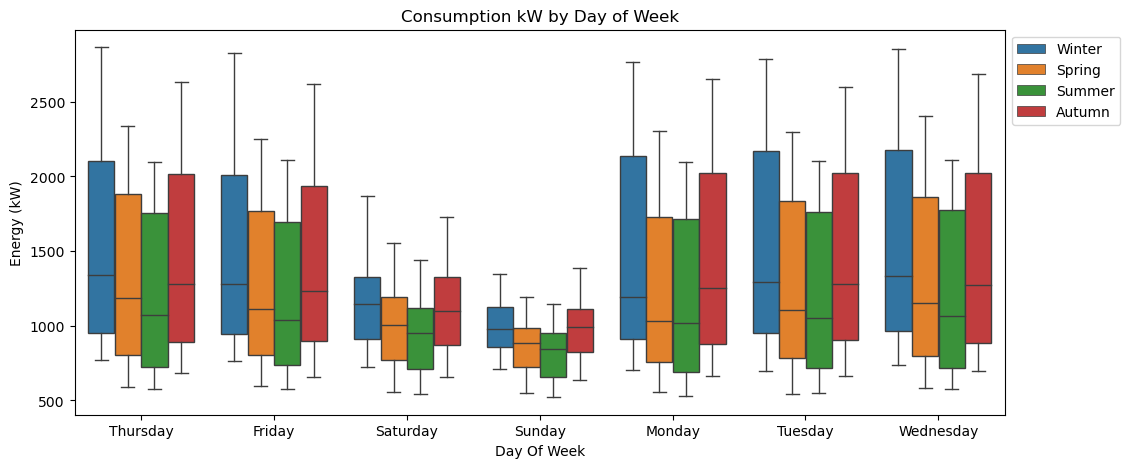

In [58]:
#Boxplot of Day of the Week and Season vs Load
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df5,
            x='DayOfWeek',
            y='Total Parameter',
            hue='Season',
            ax=ax,
            linewidth=1,
           showfliers= False)
ax.set_title('Consumption kW by Day of Week')
ax.set_xlabel('Day Of Week')
ax.set_ylabel('Energy (kW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


In [60]:
df5

,index,Measurement Description,Parameter Type and Units,Date and Time of capture,Month,Year,Quarter,DayOfWeek,Hour,Season,Records,Total Parameter,Date
0,0,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:00:00,3,2012,1,Thursday,00:00:00,Winter,17520,809.373,2012-03-01
1,910,Electricity supply meter,Consumption in period [kWh],2012-03-01 00:30:00,3,2012,1,Thursday,00:30:00,Winter,17520,793.537,2012-03-01
2,1820,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:00:00,3,2012,1,Thursday,01:00:00,Winter,17520,884.144,2012-03-01
3,2730,Electricity supply meter,Consumption in period [kWh],2012-03-01 01:30:00,3,2012,1,Thursday,01:30:00,Winter,17520,857.668,2012-03-01
4,3640,Electricity supply meter,Consumption in period [kWh],2012-03-01 02:00:00,3,2012,1,Thursday,02:00:00,Winter,17520,839.702,2012-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,15938650,Electricity supply meter,Consumption in period [kWh],2012-02-29 21:30:00,2,2012,1,Wednesday,21:30:00,Winter,17520,1102.942,2012-02-29
17516,15939560,Electricity supply meter,Consumption in period [kWh],2012-02-29 22:00:00,2,2012,1,Wednesday,22:00:00,Winter,17520,1022.449,2012-02-29
17517,15940470,Electricity supply meter,Consumption in period [kWh],2012-02-29 22:30:00,2,2012,1,Wednesday,22:30:00,Winter,17520,942.478,2012-02-29
17518,15941380,Electricity supply meter,Consumption in period [kWh],2012-02-29 23:00:00,2,2012,1,Wednesday,23:00:00,Winter,17520,914.322,2012-02-29


In [59]:
df5.to_csv("C:/Users/nanan/FinalData.csv")
df5.to_csv("C:/Users/nanan/Masters/Nana/Dissertation/DataCleaning/FinalData.csv")